## Analysis of an E-commerce Dataset Part 2

The goal of the second analysis task is to train linear regression models to predict users' ratings towards items. This involves a standard Data Science workflow: exploring data, building models, making predictions, and evaluating results. In this task, we will explore the impacts of feature selections and different sizes of training/testing data on the model performance. We will use another cleaned combined e-commerce sub-dataset that **is different from** the one in “Analysis of an E-commerce Dataset” task 1.

### Import Cleaned E-commerce Dataset
The csv file named 'cleaned_ecommerce_dataset.csv' is provided. You may need to use the Pandas method, i.e., `read_csv`, for reading it. After that, please print out its total length.

In [1]:
import pandas as pd
ec_clean = pd.read_csv('cleaned_ecommerce_dataset.csv')

print(len(ec_clean))

2685


### Explore the Dataset

* Use the methods, i.e., `head()` and `info()`, to have a rough picture about the data, e.g., how many columns, and the data types of each column.
* As our goal is to predict ratings given other columns, please get the correlations between helpfulness/gender/category/review and rating by using the `corr()` method.
* To get the correlations between different features, you may need to first convert the categorical features (i.e., gender, category and review) into numerial values. For doing this, you may need to import `OrdinalEncoder` from `sklearn.preprocessing` (refer to the useful exmaples [here](https://pbpython.com/categorical-encoding.html))
* Please provide ___necessary explanations/analysis___ on the correlations, and figure out which are the ___most___ and ___least___ corrleated features regarding rating. Try to ___discuss___ how the correlation will affect the final prediction results, if we use these features to train a regression model for rating prediction. In what follows, we will conduct experiments to verify your hypothesis.

In [2]:
# Explore the data
ec_clean.head()

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4081,71900,Not always McCrap,McDonald's,4.0,3.0,M,Restaurants & Gourmet,41,30.74,4
1,4081,72000,I dropped the chalupa even before he told me to,Taco Bell,1.0,4.0,M,Restaurants & Gourmet,74,108.30,4
2,4081,72000,The Wonderful World of Wendy,Wendy's,5.0,4.0,M,Restaurants & Gourmet,84,69.00,4
3,4081,100399,They actually did it,"South Park: Bigger, Longer & Uncut",5.0,3.0,M,Movies,68,143.11,4
4,4081,100399,Hey! Gimme some pie!,American Pie,3.0,3.0,M,Movies,6,117.89,4


In [3]:
ec_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2685 entries, 0 to 2684
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   userId       2685 non-null   int64  
 1   timestamp    2685 non-null   int64  
 2   review       2685 non-null   object 
 3   item         2685 non-null   object 
 4   rating       2685 non-null   float64
 5   helpfulness  2685 non-null   float64
 6   gender       2685 non-null   object 
 7   category     2685 non-null   object 
 8   item_id      2685 non-null   int64  
 9   item_price   2685 non-null   float64
 10  user_city    2685 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 230.9+ KB


In [4]:
# Find correlation between helpfulness/gender/category/review and rating

## Convert categorical columns
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
ec_clean[['gender', 'category', 'review']] = enc.fit_transform(ec_clean[['gender', 'category', 'review']])
ec_clean.head()

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4081,71900,1618.0,McDonald's,4.0,3.0,1.0,8.0,41,30.74,4
1,4081,72000,1125.0,Taco Bell,1.0,4.0,1.0,8.0,74,108.30,4
2,4081,72000,2185.0,Wendy's,5.0,4.0,1.0,8.0,84,69.00,4
3,4081,100399,2243.0,"South Park: Bigger, Longer & Uncut",5.0,3.0,1.0,5.0,68,143.11,4
4,4081,100399,1033.0,American Pie,3.0,3.0,1.0,5.0,6,117.89,4


In [5]:
## Find correlation
ec_clean[['helpfulness', 'gender', 'category', 'review', 'rating']].corr()

,helpfulness,gender,category,review,rating
helpfulness,1.000000,0.075947,-0.013408,-0.028259,-0.007523
gender,0.075947,1.000000,0.022549,-0.037884,-0.034337
category,-0.013408,0.022549,1.000000,0.001970,-0.163158
review,-0.028259,-0.037884,0.001970,1.000000,-0.036118
rating,-0.007523,-0.034337,-0.163158,-0.036118,1.000000


### Analysis of Correlations
- Overall, all 4 features have very weak and negative correlations with rating  
=> This is similar to what we found from boxplots of these features and rating in Portfolio 1. 
- The most correlated feature regarding rating: category (-0.163)
- The least correlated feature regarding rating: helpfulness (-0.008)
- Because of their weak correlations, these features are not useful in predicting rating, and therefore will result in incorrect prediction results. If we train a regression model on these features, the model probably will not follow linear regression and the points will be very scattered.  

### Split Training and Testing Data
* Machine learning models are trained to help make predictions for the future. Normally, we need to randomly split the dataset into training and testing sets, where we use the training set to train the model, and then leverage the well-trained model to make predictions on the testing set.
* To further investigate whether the size of the training/testing data affects the model performance, please random split the data into training and testing sets with different sizes:
    * Case 1: training data containing 10% of the entire data;
    * Case 2: training data containing 90% of the entire data.
* Print the shape of training and testing sets in the two cases.

In [6]:
from sklearn.model_selection import train_test_split

# Case 1
train1, test1 = train_test_split(ec_clean, test_size=0.9)
print(train1.shape)
print(test1.shape)

(268, 11)
(2417, 11)


In [7]:
# Case 2
train2, test2 = train_test_split(ec_clean, test_size=0.1)
print(train2.shape)
print(test2.shape)

(2416, 11)
(269, 11)


### Train Linear Regression Models with Feature Selection under Cases 1 & 2
* When training a machine learning model for prediction, we may need to select the most important/correlated input features for more accurate results.
* To investigate whether feature selection affects the model performance, please select two most correlated features and two least correlated features regarding rating, respectively.
* Train four linear regression models by following the conditions:
    - (model-a) using the training/testing data in case 1 with two most correlated input features
    - (model-b) using the training/testing data in case 1 with two least correlated input features
    - (model-c) using the training/testing data in case 2 with two most correlated input features
    - (model-d) using the training/testing data in case 2 with two least correlated input features
* By doing this, we can verify the impacts of the size of traing/testing data on the model performance via comparing model-a and model-c (or model-b and model-d); meanwhile the impacts of feature selection can be validated via comparing model-a and model-b (or model-c and model-d).    

In [8]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

In [11]:
# model-a 
X_train_a = train1[['category', 'review']]
y_train_a = train1['rating']

X_test_a = test1[['category', 'review']]
y_test_a = test1['rating']

reg.fit(X_train_a, y_train_a)

LinearRegression()

In [15]:
# model-b
X_train_b = train1[['helpfulness', 'gender']]
y_train_b = train1['rating']

X_test_b = test1[['helpfulness', 'gender']]
y_test_b = test1['rating']

reg.fit(X_train_b, y_train_b)

LinearRegression()

In [17]:
# model-c 
X_train_c = train2[['category', 'review']]
y_train_c = train2['rating']

X_test_c = test2[['category', 'review']]
y_test_c = test2['rating']

reg.fit(X_train_c, y_train_c)

LinearRegression()

In [19]:
# model-d
X_train_d = train2[['helpfulness', 'gender']]
y_train_d = train2['rating']

X_test_d = test2[['helpfulness', 'gender']]
y_test_d = test2['rating']

reg.fit(X_train_d, y_train_d)

LinearRegression()

### Evaluate Models
* Evaluate the performance of the four models with two metrics, including MSE and Root MSE
* Print the results of the four models regarding the two metrics

In [13]:
import numpy as np

In [14]:
# model-a
predicted_a = reg.predict(X_test_a)
mse_a = ((np.array(y_test_a)-predicted_a)**2).sum()/len(y_test_a)
print("MSE:", mse_a)
print("Root MSE", np.sqrt(mse_a))

MSE: 1.7724149347790987
Root MSE 1.3313207482718425


In [16]:
# model-b
predicted_b = reg.predict(X_test_b)
mse_b = ((np.array(y_test_b)-predicted_b)**2).sum()/len(y_test_b)
print("MSE:", mse_b)
print("Root MSE", np.sqrt(mse_b))

MSE: 1.807241016907284
Root MSE 1.3443366456759571


In [18]:
# model-c
predicted_c = reg.predict(X_test_c)
mse_c = ((np.array(y_test_c)-predicted_c)**2).sum()/len(y_test_c)
print("MSE:", mse_c)
print("Root MSE", np.sqrt(mse_c))

MSE: 1.7535211648823839
Root MSE 1.3242058619725197


In [20]:
# model-d
predicted_d = reg.predict(X_test_d)
mse_d = ((np.array(y_test_d)-predicted_d)**2).sum()/len(y_test_d)
print("MSE:", mse_d)
print("Root MSE", np.sqrt(mse_d))

MSE: 1.8132721079800256
Root MSE 1.3465779249564525


### Evaluate models
- Case 2 models (c & d) have smaller MSE and Root MSE compared with Case 1 models (a & b)
- Both MSE and Root MSE are smaller with the models that use the 2 most correlated variables (models a & c)  

=> Performances of the models from best to worst: c, a, d, b  
=> We can say that the bigger the training data the better (with case 2, the training data is 90% of the entire data), and we should use the most correlated features for predictions

### Visualize, Compare and Analyze the Results
* Visulize the results, and perform ___insightful analysis___ on the obtained results. For better visualization, you may need to carefully set the scale for the y-axis.
* Normally, the model trained with most correlated features and more training data will get better results. Do you obtain the similar observations? If not, please ___explain the possible reasons___.

In [22]:
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

<Axes: title={'center': 'Root MSE of 4 Models'}, xlabel='Model', ylabel='Root MSE'>

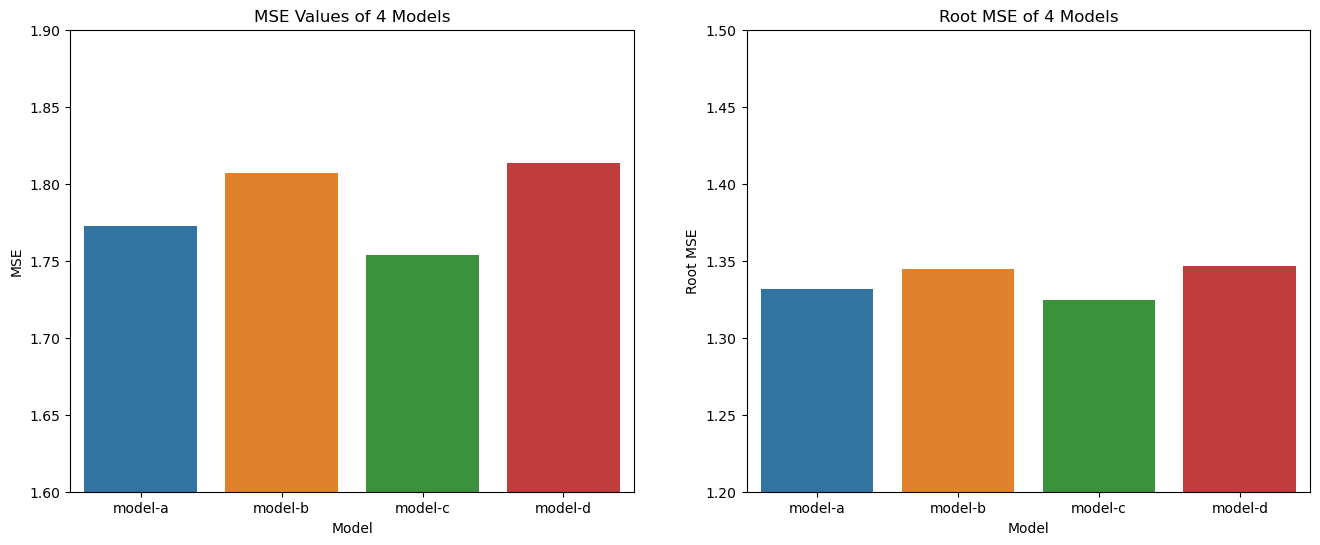

In [63]:
# create df for visualisation
## for mse
v1 = [['model-a', mse_a], ['model-b', mse_b], ['model-c', mse_c], ['model-d', mse_d]]
df1 = pd.DataFrame(v1, columns=['Model', 'MSE'])
## for root mse
v2 = [['model-a', np.sqrt(mse_a)], ['model-b', np.sqrt(mse_b)], ['model-c', np.sqrt(mse_c)], ['model-d', np.sqrt(mse_d)]]
df2 = pd.DataFrame(v2, columns=['Model', 'Root MSE'])

# visualisation
plt.figure(figsize=(16,6))
## mse
plt.subplot(1,2,1)
plt.title('MSE Values of 4 Models')
plt.ylim(1.6, 1.9)
sns.barplot(df1, x='Model', y='MSE')
## root mse
plt.subplot(1,2,2)
plt.title('Root MSE of 4 Models')
plt.ylim(1.2, 1.5)
sns.barplot(df2, x='Model', y='Root MSE')

### Analysis
- Based on the barplots above, model **a** and **c** have lower MSE and Root MSE compared to model **b** and **d**  
=> This makes sense, as model **b** and **d** use 2 least correlated features to predict 'rating'.
- Model **d** has the highest MSE and Root MSE even though it is trained on the larger training data (case 2). A possible explanation can be that because model **d** uses the 2 least correlated features, the effect of those unhelpful features are magnified by the larger data. 
- Model **c** has the best performance: it uses 2 most correlated features and has more training data.
- However, MSE and Root MSE values from all 4 models are much higher than 0, suggesting that all models are not useful in predicting 'rating'. 